In [148]:
import sys
import os
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
sys.path.append('../')
import pandas as pd
import json
import os
from pandas.io.json import json_normalize
import numpy as np
import scipy
pd.set_option('precision',2)
PATH_TRAIN      = '../output/models/'
PATH_EVALUATION = '../output/evaluation/'
PATH_EVAL_REINFORCEMENT = '../output/interaction/'

In [149]:
#@st.cache
def fetch_results_path():
    paths  = []
    models = []
    for root, dirs, files in os.walk(PATH_EVALUATION):
      if '/results' in root and 'Evaluate' in root:
        for d in dirs:
          paths.append(os.path.join(root, d))
          models.append(d) #.replace("_"+d.split("_")[-1], "")
              
    return dict(zip(models, paths))

def json2df(paths, file, idx):
  data = []
  for model, path in paths.items():
    file_path = os.path.join(path, file)
    print(file_path)
    try:
      with open(file_path) as json_file:
        d = json.load(json_file)
        d['path']  = path.split("/")[-1]
        d['model'] = d['path'].replace("_"+d['path'].split("_")[-1], "")

        data.append(d)
    except:
      data.append({'path': path.split("/")[-1]})

  df = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
  
  df = df.set_index(idx)

  return df

def fetch_iteraction_results_path():
    paths  = []
    models = []
    for root, dirs, files in os.walk(PATH_EVAL_REINFORCEMENT, followlinks=True):
      if '/results' in root and 'Interaction' in root:
        for d in dirs:
          paths.append(os.path.join(root, d))
          models.append(d) #.replace("_"+d.split("_")[-1], "")
              
    return dict(zip(models, paths))  


def fetch_training_path():
    paths  = []
    models = []
    for root, dirs, files in os.walk(PATH_TRAIN):
      if '/results' in root:
        for d in dirs:
          paths.append(os.path.join(root, d))
          models.append(d)
              
    return dict(zip(models, paths))

def load_iteractions_params(iteractions):
  if len(iteractions) == 0:
    return pd.DataFrame()

  dfs = []

  for model in iteractions:

    file_path = os.path.join(fetch_iteraction_results_path()[model], 'params.json')
    data      = []

    try:
      with open(file_path) as json_file:
        d = json.load(json_file)
        data.append(d)

      df = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
      
    except:
      df = pd.DataFrame()

    df['iteraction'] = model
    dfs.append(df)
  
  return pd.concat(dfs)

In [150]:
fetch_iteraction_results_path()

{'TrivagoLogisticModelInteraction_selu____epsilon_greedy_990cf44e19': '../output/interaction/TrivagoLogisticModelInteraction/results/TrivagoLogisticModelInteraction_selu____epsilon_greedy_990cf44e19',
 'TrivagoLogisticModelInteraction_selu____custom_lin_ucb_04df5f5d33': '../output/interaction/TrivagoLogisticModelInteraction/results/TrivagoLogisticModelInteraction_selu____custom_lin_ucb_04df5f5d33',
 'TrivagoLogisticModelInteraction_selu____percentile_adapt_14fbc64032': '../output/interaction/TrivagoLogisticModelInteraction/results/TrivagoLogisticModelInteraction_selu____percentile_adapt_14fbc64032',
 'TrivagoLogisticModelInteraction_selu____adaptive_1bcd25f722': '../output/interaction/TrivagoLogisticModelInteraction/results/TrivagoLogisticModelInteraction_selu____adaptive_1bcd25f722',
 'TrivagoLogisticModelInteraction_selu____lin_ucb_9a82ed9555': '../output/interaction/TrivagoLogisticModelInteraction/results/TrivagoLogisticModelInteraction_selu____lin_ucb_9a82ed9555',
 'TrivagoLogistic

In [151]:
def load_data_metrics():
  return json2df(fetch_results_path(), 'metrics.json', 'path')

def load_eval_params():
  return json2df(fetch_results_path(), 'params.json', 'path')

def load_train_params():
  return json2df(fetch_training_path(), 'params.json', 'path')

In [152]:
df_metrics  = load_data_metrics().dropna()
metrics_col = df_metrics.columns
df_metrics.shape
df_metrics.head()

../output/evaluation/EvaluateTrivagoTestSetPredictions/results/TrivagoLogisticModelTraining_selu____model_e3d6670bf2_684f46d0f3_ps_model/metrics.json
../output/evaluation/EvaluateTrivagoTestSetPredictions/results/TrivagoLogisticModelTraining_selu____model_a28fc6c480_cc829bb0ee_ps_model/metrics.json
../output/evaluation/EvaluateTrivagoTestSetPredictions/results/TrivagoLogisticModelTraining_selu____model_accec28c65_63bfa01c4a_ps_model/metrics.json
../output/evaluation/EvaluateTrivagoTestSetPredictions/results/TrivagoLogisticModelTraining_selu____model_9b761199e2_6b70bf859b_ps_model/metrics.json
../output/evaluation/EvaluateTrivagoTestSetPredictions/results/TrivagoLogisticModelTraining_selu____model_06b7d18580_330cc4d8c8_ps_model/metrics.json
../output/evaluation/EvaluateTrivagoTestSetPredictions/results/TrivagoLogisticModelTraining_selu____model_1fee7ba160_e12f9a6877_ps_model/metrics.json
../output/evaluation/EvaluateTrivagoTestSetPredictions/results/TrivagoLogisticModelTraining_selu____

,model_task,count,mean_average_precision,precision_at_1,ndcg_at_5,ndcg_at_10,ndcg_at_15,ndcg_at_20,ndcg_at_50,coverage_at_5,...,IPS,IPS_C,CIPS,CIPS_C,SNIPS,SNIPS_C,DirectEstimator,DoublyRobust,DoublyRobust_C,model
path,,,,,,,,,,,,,,,,,,,,,
TrivagoLogisticModelTraining_selu____model_e3d6670bf2_684f46d0f3_ps_model,TrivagoLogisticModelTraining_selu____model_e3d...,377.0,0.42,0.32,0.43,0.48,0.52,0.55,0.57,0.29,...,0.29,0.52,0.18,0.29,0.31,4.97e-03,0.19,0.27,0.03,TrivagoLogisticModelTraining_selu____e3d6670bf...
TrivagoLogisticModelTraining_selu____model_a28fc6c480_cc829bb0ee_ps_model,TrivagoLogisticModelTraining_selu____model_a28...,377.0,0.44,0.34,0.45,0.50,0.53,0.57,0.59,0.31,...,0.33,0.65,0.19,0.31,0.34,5.56e-03,0.20,0.31,0.05,TrivagoLogisticModelTraining_selu____a28fc6c48...
TrivagoLogisticModelTraining_selu____model_accec28c65_63bfa01c4a_ps_model,TrivagoLogisticModelTraining_selu____model_acc...,377.0,0.43,0.34,0.43,0.48,0.52,0.55,0.57,0.30,...,0.36,0.91,0.20,0.35,0.36,7.10e-03,0.20,0.34,0.07,TrivagoLogisticModelTraining_selu____accec28c6...
TrivagoLogisticModelTraining_selu____model_9b761199e2_6b70bf859b_ps_model,TrivagoLogisticModelTraining_selu____model_9b7...,377.0,0.43,0.35,0.44,0.48,0.52,0.56,0.58,0.31,...,0.33,0.63,0.20,0.31,0.33,5.39e-03,0.20,0.30,0.05,TrivagoLogisticModelTraining_selu____9b761199e...
TrivagoLogisticModelTraining_selu____model_06b7d18580_330cc4d8c8_ps_model,TrivagoLogisticModelTraining_selu____model_06b...,377.0,0.43,0.34,0.43,0.49,0.53,0.56,0.58,0.31,...,0.35,0.86,0.19,0.33,0.37,6.81e-03,0.19,0.33,0.07,TrivagoLogisticModelTraining_selu____06b7d1858...


In [153]:
df_metrics

,model_task,count,mean_average_precision,precision_at_1,ndcg_at_5,ndcg_at_10,ndcg_at_15,ndcg_at_20,ndcg_at_50,coverage_at_5,...,IPS,IPS_C,CIPS,CIPS_C,SNIPS,SNIPS_C,DirectEstimator,DoublyRobust,DoublyRobust_C,model
path,,,,,,,,,,,,,,,,,,,,,
TrivagoLogisticModelTraining_selu____model_e3d6670bf2_684f46d0f3_ps_model,TrivagoLogisticModelTraining_selu____model_e3d...,377.0,0.42,0.32,0.43,0.48,0.52,0.55,0.57,0.29,...,0.29,0.52,0.18,0.29,0.31,4.97e-03,0.19,0.27,0.03,TrivagoLogisticModelTraining_selu____e3d6670bf...
TrivagoLogisticModelTraining_selu____model_a28fc6c480_cc829bb0ee_ps_model,TrivagoLogisticModelTraining_selu____model_a28...,377.0,0.44,0.34,0.45,0.50,0.53,0.57,0.59,0.31,...,0.33,0.65,0.19,0.31,0.34,5.56e-03,0.20,0.31,0.05,TrivagoLogisticModelTraining_selu____a28fc6c48...
TrivagoLogisticModelTraining_selu____model_accec28c65_63bfa01c4a_ps_model,TrivagoLogisticModelTraining_selu____model_acc...,377.0,0.43,0.34,0.43,0.48,0.52,0.55,0.57,0.30,...,0.36,0.91,0.20,0.35,0.36,7.10e-03,0.20,0.34,0.07,TrivagoLogisticModelTraining_selu____accec28c6...
TrivagoLogisticModelTraining_selu____model_9b761199e2_6b70bf859b_ps_model,TrivagoLogisticModelTraining_selu____model_9b7...,377.0,0.43,0.35,0.44,0.48,0.52,0.56,0.58,0.31,...,0.33,0.63,0.20,0.31,0.33,5.39e-03,0.20,0.30,0.05,TrivagoLogisticModelTraining_selu____9b761199e...
TrivagoLogisticModelTraining_selu____model_06b7d18580_330cc4d8c8_ps_model,TrivagoLogisticModelTraining_selu____model_06b...,377.0,0.43,0.34,0.43,0.49,0.53,0.56,0.58,0.31,...,0.35,0.86,0.19,0.33,0.37,6.81e-03,0.19,0.33,0.07,TrivagoLogisticModelTraining_selu____06b7d1858...
TrivagoLogisticModelTraining_selu____model_1fee7ba160_e12f9a6877_ps_model,TrivagoLogisticModelTraining_selu____model_1fe...,377.0,0.43,0.34,0.44,0.49,0.52,0.56,0.58,0.29,...,0.35,0.74,0.20,0.31,0.35,5.87e-03,0.19,0.33,0.06,TrivagoLogisticModelTraining_selu____1fee7ba16...
TrivagoLogisticModelTraining_selu____model_d4c876fbe0_eb84c0080c_ps_model,TrivagoLogisticModelTraining_selu____model_d4c...,377.0,0.43,0.35,0.43,0.48,0.52,0.55,0.57,0.29,...,0.35,0.88,0.20,0.34,0.36,6.92e-03,0.19,0.32,0.07,TrivagoLogisticModelTraining_selu____d4c876fbe...
TrivagoLogisticModelTraining_selu____model_568773dc19_71ca3dff54_ps_model,TrivagoLogisticModelTraining_selu____model_568...,377.0,0.44,0.36,0.43,0.48,0.52,0.55,0.57,0.30,...,0.36,0.69,0.21,0.33,0.38,5.94e-03,0.20,0.33,0.05,TrivagoLogisticModelTraining_selu____568773dc1...
TrivagoLogisticModelTraining_selu____model_199da942b6_57b018f583_ps_model,TrivagoLogisticModelTraining_selu____model_199...,377.0,0.44,0.36,0.43,0.48,0.52,0.55,0.57,0.30,...,0.36,0.68,0.21,0.33,0.38,5.81e-03,0.20,0.33,0.05,TrivagoLogisticModelTraining_selu____199da942b...


In [154]:
#fetch_training_path()['PolicyEstimatorTraining____500___filter_city____21207f8a4b']

In [155]:
df_params   = load_train_params()
df_params.head()

../output/models/PolicyEstimatorTraining/results/PolicyEstimatorTraining____500___filter_city____21207f8a4b/params.json
../output/models/PolicyEstimatorTraining/results/PolicyEstimatorTraining____500___filter_city____4786dbe2a1/params.json
../output/models/PolicyEstimatorTraining/results/PolicyEstimatorTraining____500___filter_city____09161871dd/params.json
../output/models/PolicyEstimatorTraining/results/PolicyEstimatorTraining____500___filter_city____5dcbc9cdd5/params.json
../output/models/PolicyEstimatorTraining/results/PolicyEstimatorTraining____500___filter_city____659c4ff8bb/params.json
../output/models/PolicyEstimatorTraining/results/PolicyEstimatorTraining____500___filter_city____e1da1d0e34/params.json
../output/models/PolicyEstimatorTraining/results/PolicyEstimatorTraining____500___filter_city____7ec3ad3925/params.json
../output/models/PolicyEstimatorTraining/results/PolicyEstimatorTraining____500___filter_city____424b166696/params.json
../output/models/PolicyEstimatorTraining

,project,sample_size,minimum_interactions,session_test_size,dataset_split_method,test_split_type,n_splits,split_index,sampling_strategy,balance_fields,...,bandit_policy,fill_ps_strategy,loss_function,n_factors,dropout_prob,dropout_module,activation_function,filter_sizes,num_filters,loss_function_params.clip
path,,,,,,,,,,,,,,,,,,,,,
PolicyEstimatorTraining____500___filter_city____21207f8a4b,trivago_contextual_bandit,-1.0,5.0,0.1,time,random,5.0,0.0,none,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PolicyEstimatorTraining____500___filter_city____4786dbe2a1,trivago_contextual_bandit,-1.0,5.0,0.1,time,random,5.0,0.0,none,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PolicyEstimatorTraining____500___filter_city____09161871dd,trivago_contextual_bandit,-1.0,5.0,0.1,time,random,5.0,0.0,none,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PolicyEstimatorTraining____500___filter_city____5dcbc9cdd5,trivago_contextual_bandit,-1.0,5.0,0.1,time,random,5.0,0.0,none,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PolicyEstimatorTraining____500___filter_city____659c4ff8bb,trivago_contextual_bandit,-1.0,5.0,0.1,time,random,5.0,0.0,none,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
#df_params.iloc[0]

In [157]:
#df_metrics.shape, df_params.shape

In [158]:
#df_params
df = df_metrics.reset_index().merge(df_params,  left_on='model_task', right_on='path').fillna("-")
df

,path,model_task,count,mean_average_precision,precision_at_1,ndcg_at_5,ndcg_at_10,ndcg_at_15,ndcg_at_20,ndcg_at_50,...,bandit_policy,fill_ps_strategy,loss_function,n_factors,dropout_prob,dropout_module,activation_function,filter_sizes,num_filters,loss_function_params.clip
0,TrivagoLogisticModelTraining_selu____model_e3d...,TrivagoLogisticModelTraining_selu____model_e3d...,377.0,0.42,0.32,0.43,0.48,0.52,0.55,0.57,...,model,model,crm,50.0,0.1,alpha,selu,"[1, 3, 5]",64.0,1e+02
1,TrivagoLogisticModelTraining_selu____model_a28...,TrivagoLogisticModelTraining_selu____model_a28...,377.0,0.44,0.34,0.45,0.50,0.53,0.57,0.59,...,model,model,crm,50.0,0.1,alpha,selu,"[1, 3, 5]",64.0,1e+02
2,TrivagoLogisticModelTraining_selu____model_acc...,TrivagoLogisticModelTraining_selu____model_acc...,377.0,0.43,0.34,0.43,0.48,0.52,0.55,0.57,...,model,model,crm,50.0,0.1,alpha,selu,"[1, 3, 5]",64.0,-
3,TrivagoLogisticModelTraining_selu____model_9b7...,TrivagoLogisticModelTraining_selu____model_9b7...,377.0,0.43,0.35,0.44,0.48,0.52,0.56,0.58,...,model,per_logistic_regression_of_pos_item_idx_and_it...,bce,50.0,0.1,alpha,selu,"[1, 3, 5]",64.0,-
4,TrivagoLogisticModelTraining_selu____model_06b...,TrivagoLogisticModelTraining_selu____model_06b...,377.0,0.43,0.34,0.43,0.49,0.53,0.56,0.58,...,model,model,crm,50.0,0.1,alpha,selu,"[1, 3, 5]",64.0,-
5,TrivagoLogisticModelTraining_selu____model_1fe...,TrivagoLogisticModelTraining_selu____model_1fe...,377.0,0.43,0.34,0.44,0.49,0.52,0.56,0.58,...,model,model,crm,50.0,0.1,alpha,selu,"[1, 3, 5]",64.0,-
6,TrivagoLogisticModelTraining_selu____model_d4c...,TrivagoLogisticModelTraining_selu____model_d4c...,377.0,0.43,0.35,0.43,0.48,0.52,0.55,0.57,...,model,model,crm,50.0,0.1,alpha,selu,"[1, 3, 5]",64.0,-
7,TrivagoLogisticModelTraining_selu____model_568...,TrivagoLogisticModelTraining_selu____model_568...,377.0,0.44,0.36,0.43,0.48,0.52,0.55,0.57,...,model,model,crm,50.0,0.1,alpha,selu,"[1, 3, 5]",64.0,1
8,TrivagoLogisticModelTraining_selu____model_199...,TrivagoLogisticModelTraining_selu____model_199...,377.0,0.44,0.36,0.43,0.48,0.52,0.55,0.57,...,model,model,crm,50.0,0.1,alpha,selu,"[1, 3, 5]",64.0,5
9,TrivagoLogisticModelTraining_selu____model_543...,TrivagoLogisticModelTraining_selu____model_543...,377.0,0.43,0.36,0.43,0.48,0.51,0.54,0.57,...,model,model,crm,50.0,0.1,alpha,selu,"[1, 3, 5]",64.0,1e+02


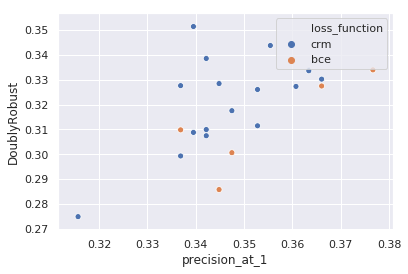

In [159]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="precision_at_1", y="DoublyRobust", hue="loss_function", data=df)

#plt.plot(df.precision_at_1, df.DoublyRobust)

In [160]:
df['loss_function_params.clip']

0     1e+02
1     1e+02
2         -
3         -
4         -
5         -
6         -
7         1
8         5
9     1e+02
10        -
11        -
12        -
13    1e+02
14       10
15        -
16       20
17       40
18        -
19    1e+02
20        -
21    1e+02
Name: loss_function_params.clip, dtype: object

In [161]:
df.iloc[0]

path                         TrivagoLogisticModelTraining_selu____model_e3d...
model_task                   TrivagoLogisticModelTraining_selu____model_e3d...
count                                                                  3.8e+02
mean_average_precision                                                    0.42
precision_at_1                                                            0.32
                                                   ...                        
dropout_module                                                           alpha
activation_function                                                       selu
filter_sizes                                                         [1, 3, 5]
num_filters                                                                 64
loss_function_params.clip                                                1e+02
Name: 0, Length: 76, dtype: object

In [163]:
metrics_col = ['mean_average_precision', 'precision_at_1',
               'ndcg_at_5', 'ndcg_at_10', 'ndcg_at_15', 'ndcg_at_20', 'ndcg_at_50',
               'coverage_at_5', 'coverage_at_10', 'coverage_at_15', 'coverage_at_20',
               'coverage_at_50', 'personalization_at_5', 'personalization_at_10',
               'personalization_at_15', 'personalization_at_20',
               'personalization_at_50', 'IPS', 'IPS_C', 'CIPS', 'CIPS_C', 'SNIPS',
               'SNIPS_C', 'DirectEstimator', 'DoublyRobust', 'DoublyRobust_C']

def group_results(df):
    agg = {'count': 'count'}
    for i in metrics_col:
        agg[i] = 'mean'

    df_group  = df.groupby(['loss_function', 'loss_function_params.clip']).agg(agg)#mean()[metrics_col]
    return df_group
    #    

strategy = [
        "_ps_per_pos_item_idx",
        "_ps_per_item",
        "_ps_per_item_in_first_pos",
        "_ps_per_item_given_pos",
        "_ps_per_logistic_regression_of_pos_item_idx_and_item",
        "_ps_per_logistic_regression_of_pos_item_idx_and_item_ps",
        "_ps_model",
    ]


results = []
for s in strategy:
    per_strategy = df[df.path.str.endswith(s)]
    per_strategy['strategy'] = s
    
    results.append(per_strategy)

_df_results = pd.concat(results)
df_results = group_results(_df_results).reset_index()
df_results


,loss_function,loss_function_params.clip,count,mean_average_precision,precision_at_1,ndcg_at_5,ndcg_at_10,ndcg_at_15,ndcg_at_20,ndcg_at_50,...,personalization_at_50,IPS,IPS_C,CIPS,CIPS_C,SNIPS,SNIPS_C,DirectEstimator,DoublyRobust,DoublyRobust_C
0,bce,-,5,0.45,0.35,0.46,0.51,0.54,0.57,0.59,...,0.77,0.34,0.65,0.20,0.32,0.35,5.55e-03,0.20,0.31,0.05
1,crm,1,1,0.44,0.36,0.43,0.48,0.52,0.55,0.57,...,0.78,0.36,0.69,0.21,0.33,0.38,5.94e-03,0.20,0.33,0.05
2,crm,5,1,0.44,0.36,0.43,0.48,0.52,0.55,0.57,...,0.78,0.36,0.68,0.21,0.33,0.38,5.81e-03,0.20,0.33,0.05
3,crm,10,1,0.44,0.37,0.44,0.49,0.52,0.56,0.58,...,0.78,0.35,0.68,0.21,0.33,0.38,5.92e-03,0.20,0.33,0.05
4,crm,20,1,0.44,0.36,0.44,0.48,0.52,0.55,0.57,...,0.79,0.35,0.69,0.20,0.33,0.37,5.93e-03,0.20,0.33,0.05
5,crm,40,1,0.42,0.34,0.43,0.48,0.51,0.54,0.57,...,0.79,0.33,0.65,0.19,0.31,0.34,5.61e-03,0.20,0.31,0.05
6,crm,1e+02,6,0.43,0.34,0.44,0.49,0.52,0.55,0.58,...,0.78,0.34,0.75,0.19,0.32,0.35,6.15e-03,0.20,0.32,0.06
7,crm,-,6,0.43,0.34,0.43,0.48,0.52,0.55,0.58,...,0.78,0.35,0.80,0.20,0.33,0.35,6.42e-03,0.19,0.32,0.07


In [164]:
df_results['name'] = df_results['loss_function'] + df_results['loss_function_params.clip'].apply(str)

In [165]:
#df_results.sort_values(['strategy', 'loss_function', 'crm_ps_strategy']).to_csv('metrics_artigo.csv', float_format='%.3f')

In [166]:
#!cat metrics_artigo.csv

In [167]:
#
#columns = ['name', 'strategy', 'mean_average_precision', 'precision_at_1', 'ndcg_at_5']
#df_results.sort_values(['strategy', 'loss_function', 'crm_ps_strategy']).to_csv('metrics_artigo.csv', float_format='%.3f')

## Plot

In [173]:
df_plot = df_results#[(df_results['strategy'] == '_ps_model') & (df_results['crm_ps_strategy'] == 'bandit')]# .strategy.head()
df_plot#.head()

,loss_function,loss_function_params.clip,count,mean_average_precision,precision_at_1,ndcg_at_5,ndcg_at_10,ndcg_at_15,ndcg_at_20,ndcg_at_50,...,IPS,IPS_C,CIPS,CIPS_C,SNIPS,SNIPS_C,DirectEstimator,DoublyRobust,DoublyRobust_C,name
0,bce,-,5,0.45,0.35,0.46,0.51,0.54,0.57,0.59,...,0.34,0.65,0.20,0.32,0.35,5.55e-03,0.20,0.31,0.05,bce-
1,crm,1,1,0.44,0.36,0.43,0.48,0.52,0.55,0.57,...,0.36,0.69,0.21,0.33,0.38,5.94e-03,0.20,0.33,0.05,crm1.0
2,crm,5,1,0.44,0.36,0.43,0.48,0.52,0.55,0.57,...,0.36,0.68,0.21,0.33,0.38,5.81e-03,0.20,0.33,0.05,crm5.0
3,crm,10,1,0.44,0.37,0.44,0.49,0.52,0.56,0.58,...,0.35,0.68,0.21,0.33,0.38,5.92e-03,0.20,0.33,0.05,crm10.0
4,crm,20,1,0.44,0.36,0.44,0.48,0.52,0.55,0.57,...,0.35,0.69,0.20,0.33,0.37,5.93e-03,0.20,0.33,0.05,crm20.0
5,crm,40,1,0.42,0.34,0.43,0.48,0.51,0.54,0.57,...,0.33,0.65,0.19,0.31,0.34,5.61e-03,0.20,0.31,0.05,crm40.0
6,crm,1e+02,6,0.43,0.34,0.44,0.49,0.52,0.55,0.58,...,0.34,0.75,0.19,0.32,0.35,6.15e-03,0.20,0.32,0.06,crm100.0
7,crm,-,6,0.43,0.34,0.43,0.48,0.52,0.55,0.58,...,0.35,0.80,0.20,0.33,0.35,6.42e-03,0.19,0.32,0.07,crm-


In [169]:
data_metrics  = df_plot.set_index('name')
input_metrics = ['ndcg_at_5', 'mean_average_precision', 'IPS']
#input_params       = st.sidebar.multiselect("Parameters", sorted(data_params.columns))

def get_confidente_metrics(data_metrics, input_metrics):

    confidence_metrics = data_metrics[[c for c in data_metrics.columns if "_C" in c]]
    for c in input_metrics:
      c_column = c+"_C" 
      confidence_metrics[c_column] = data_metrics[c_column] if c_column in data_metrics else None
    confidence_metrics = confidence_metrics[[c+"_C" for c in input_metrics]]

    return confidence_metrics

In [170]:
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import os
import seaborn as sns
import plotly.express as px
#from util import mean_confidence_interval
TEMPLATE = 'plotly_white' #simple_white


def plot_bar(df, confidence=None, title=""):
  data = []
  for i, row in df.iterrows():
    data.append(go.Bar(name=row.name, x=row.keys(), y=row.values,
                      error_y= dict(type='data', array=confidence.loc[row.name].values)))
  
  fig = go.Figure(data=data)
  # Change the bar mode
  fig.update_layout(template=TEMPLATE, legend_orientation="h", 
                    xaxis_title="Metric", yaxis_title="Value",
                    legend=dict(y=-0.2), title=title)
  #st.plotly_chart(fig)
  return fig


In [174]:
data_metrics#.head()

,loss_function,loss_function_params.clip,count,mean_average_precision,precision_at_1,ndcg_at_5,ndcg_at_10,ndcg_at_15,ndcg_at_20,ndcg_at_50,...,personalization_at_50,IPS,IPS_C,CIPS,CIPS_C,SNIPS,SNIPS_C,DirectEstimator,DoublyRobust,DoublyRobust_C
name,,,,,,,,,,,,,,,,,,,,,
bce-,bce,-,5,0.45,0.35,0.46,0.51,0.54,0.57,0.59,...,0.77,0.34,0.65,0.20,0.32,0.35,5.55e-03,0.20,0.31,0.05
crm1.0,crm,1,1,0.44,0.36,0.43,0.48,0.52,0.55,0.57,...,0.78,0.36,0.69,0.21,0.33,0.38,5.94e-03,0.20,0.33,0.05
crm5.0,crm,5,1,0.44,0.36,0.43,0.48,0.52,0.55,0.57,...,0.78,0.36,0.68,0.21,0.33,0.38,5.81e-03,0.20,0.33,0.05
crm10.0,crm,10,1,0.44,0.37,0.44,0.49,0.52,0.56,0.58,...,0.78,0.35,0.68,0.21,0.33,0.38,5.92e-03,0.20,0.33,0.05
crm20.0,crm,20,1,0.44,0.36,0.44,0.48,0.52,0.55,0.57,...,0.79,0.35,0.69,0.20,0.33,0.37,5.93e-03,0.20,0.33,0.05
crm40.0,crm,40,1,0.42,0.34,0.43,0.48,0.51,0.54,0.57,...,0.79,0.33,0.65,0.19,0.31,0.34,5.61e-03,0.20,0.31,0.05
crm100.0,crm,1e+02,6,0.43,0.34,0.44,0.49,0.52,0.55,0.58,...,0.78,0.34,0.75,0.19,0.32,0.35,6.15e-03,0.20,0.32,0.06
crm-,crm,-,6,0.43,0.34,0.43,0.48,0.52,0.55,0.58,...,0.78,0.35,0.80,0.20,0.33,0.35,6.42e-03,0.19,0.32,0.07


In [172]:
columns  = ['SNIPS', 'DirectEstimator', 'DoublyRobust', 'ndcg_at_5', 'precision_at_1']
strategy = ''

data_metrics = df_results.set_index('name')#[(df_results['loss_function'] == strategy)]# .strategy.head()
confidence_metrics = get_confidente_metrics(data_metrics, columns)
plot_bar(data_metrics[columns], confidence = confidence_metrics, title="Comparison of Recsys Metrics - " + strategy)

In [181]:
data_metrics.to_csv('../experiments/artigo_results/oracle_bce_crm_result.csv')

In [175]:
# columns = ['IPS', 'CIPS', 'DirectEstimator', 'DoublyRobust', 'ndcg_at_5', 'precision_at_1']
# strategy = '_ps_per_item'

# data_metrics = df_results[(df_results['strategy'] == strategy) & 
#                      (df_results['crm_ps_strategy'] == 'bandit')].set_index('name')# .strategy.head()
# confidence_metrics = get_confidente_metrics(data_metrics, columns)
# plot_bar(data_metrics[columns], confidence = confidence_metrics, title="Comparison of Recsys Metrics - " + strategy)

In [176]:
# columns = ['IPS', 'CIPS', 'DirectEstimator', 'DoublyRobust', 'ndcg_at_5', 'precision_at_1']
# strategy = '_ps_per_item_given_pos'

# data_metrics = df_results[(df_results['strategy'] == strategy) & 
#                      (df_results['crm_ps_strategy'] == 'bandit')].set_index('name')# .strategy.head()
# confidence_metrics = get_confidente_metrics(data_metrics, columns)
# plot_bar(data_metrics[columns], confidence = confidence_metrics, title="Comparison of Recsys Metrics - " + strategy)

In [177]:
# columns = ['IPS', 'CIPS', 'DirectEstimator', 'DoublyRobust', 'ndcg_at_5', 'precision_at_1']
# strategy = '_ps_per_item_in_first_pos'

# data_metrics = df_results[(df_results['strategy'] == strategy) & 
#                      (df_results['crm_ps_strategy'] == 'bandit')].set_index('name')# .strategy.head()
# confidence_metrics = get_confidente_metrics(data_metrics, columns)
# plot_bar(data_metrics[columns], confidence = confidence_metrics, title="Comparison of Recsys Metrics - " + strategy)

In [178]:
# columns = ['IPS', 'CIPS', 'DirectEstimator', 'DoublyRobust', 'ndcg_at_5', 'precision_at_1']
# strategy = '_ps_per_logistic_regression_of_pos_item_idx_and_item'

# data_metrics = df_results[(df_results['strategy'] == strategy) & 
#                      (df_results['crm_ps_strategy'] == 'bandit')].set_index('name')# .strategy.head()
# confidence_metrics = get_confidente_metrics(data_metrics, columns)
# plot_bar(data_metrics[columns], confidence = confidence_metrics, title="Comparison of Recsys Metrics - " + strategy)

In [179]:
# columns = ['IPS', 'CIPS', 'DirectEstimator', 'DoublyRobust', 'ndcg_at_5', 'precision_at_1']
# strategy = '_ps_per_pos_item_idx'

# data_metrics = df_results[(df_results['strategy'] == strategy) & 
#                      (df_results['crm_ps_strategy'] == 'bandit')].set_index('name')# .strategy.head()
# confidence_metrics = get_confidente_metrics(data_metrics, columns)
# plot_bar(data_metrics[columns], confidence = confidence_metrics, title="Comparison of Recsys Metrics - " + strategy)

In [40]:
# columns = ['IPS', 'CIPS', 'DirectEstimator', 'DoublyRobust', 'ndcg_at_5', 'precision_at_1']
# strategy = '_ps_per_item'

# data_metrics = df_results[(df_results['strategy'] == strategy) & 
#                      (df_results['crm_ps_strategy'] == 'dataset')].set_index('name')# .strategy.head()
# confidence_metrics = get_confidente_metrics(data_metrics, columns)
# plot_bar(data_metrics[columns], confidence = confidence_metrics, title="Comparison of Recsys Metrics - " + strategy)